In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from benchmark.file import concat_results
from benchmark.environment import IMPROVEMENTS, STATES
import seaborn as sns
import matplotlib.pyplot as plt
from os import chdir
from pathlib import Path
from itertools import product


if not "PROJECT_DIR" in globals():
    PROJECT_DIR = Path().resolve().parent
    chdir(PROJECT_DIR)


if not "OUT_DIR" in globals():
    OUT_DIR = PROJECT_DIR / "out" / "runtime"


if not "FIG_DIR" in globals():
    FIG_DIR = PROJECT_DIR / "figures" / "runtime"
    FIG_DIR.mkdir(exist_ok=True, parents=True)

In [2]:
states = list(product(IMPROVEMENTS, STATES))
states

[('environment-independence', 'before'),
 ('environment-independence', 'after'),
 ('service-merge', 'before'),
 ('service-merge', 'after')]

## Deployment

In [3]:
deployment_actions = ["cold-start", "warm-start", "stop", "remove"]

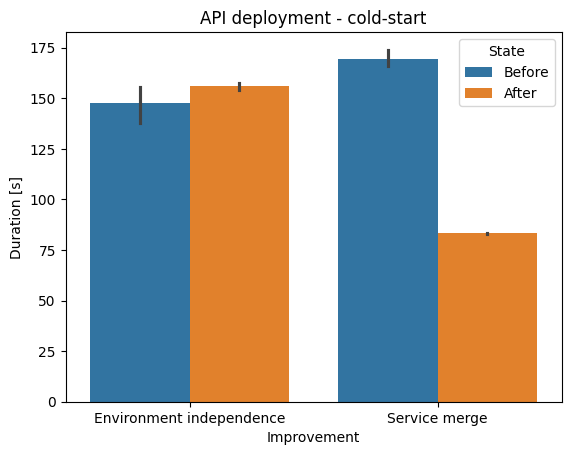

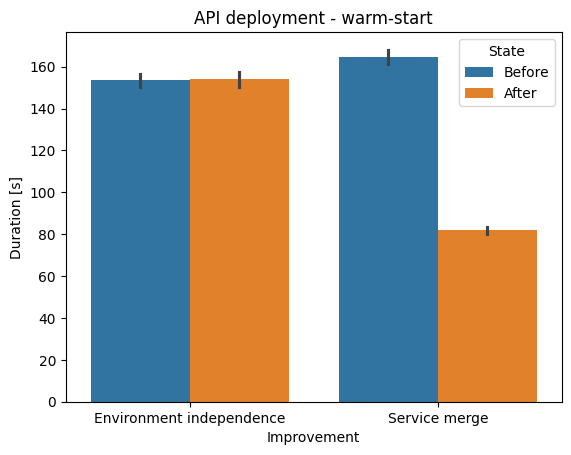

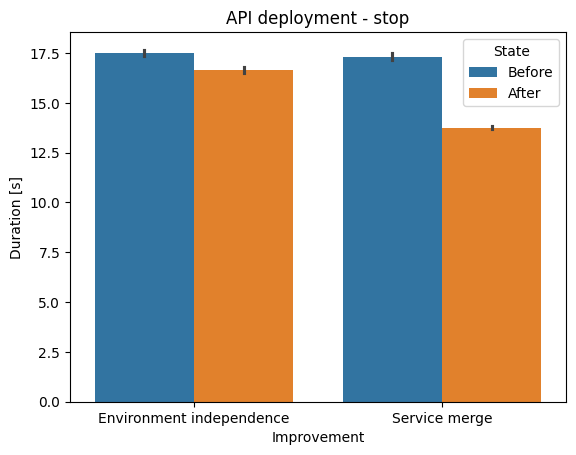

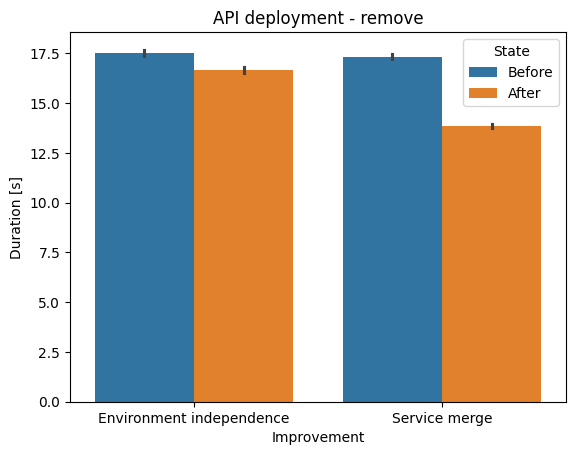

In [4]:
for deployment_action in deployment_actions:
    data = concat_results(
        action=deployment_action,
        states=states,
        directory=OUT_DIR,
    )
    sns.barplot(
        data=data,
        x="Improvement",
        y="Duration",
        hue="State",
    )
    plt.title(f"API deployment - {deployment_action}")
    plt.ylabel("Duration [s]")
    plt.savefig(FIG_DIR / f"deployment-benchmark_{deployment_action}.pdf")
    plt.show()

## API

In [5]:
api_actions = [
    "create-database",
    "create-table",
    "create-query",
    "execute-query",
    "insert-row",
    "update-row",
    "delete-row",
    "import-csv",
]

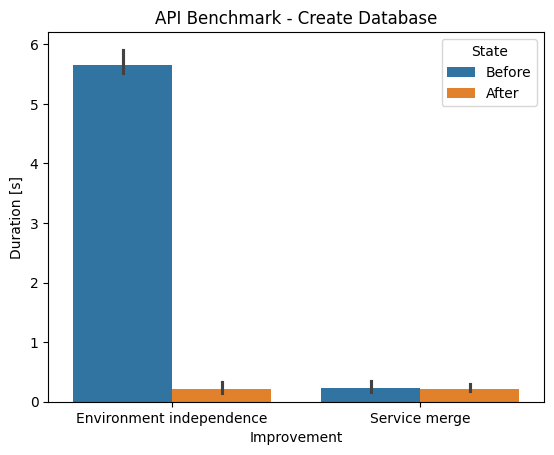

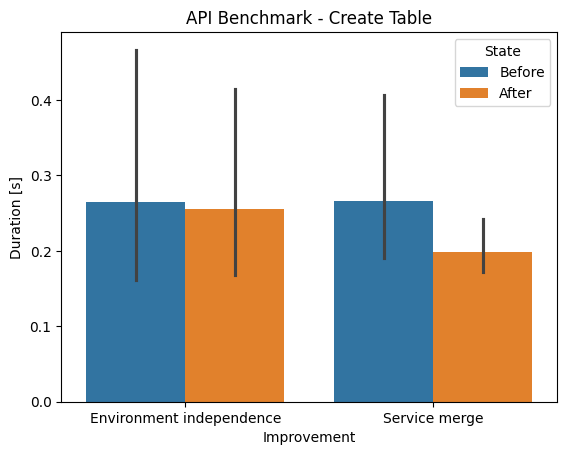

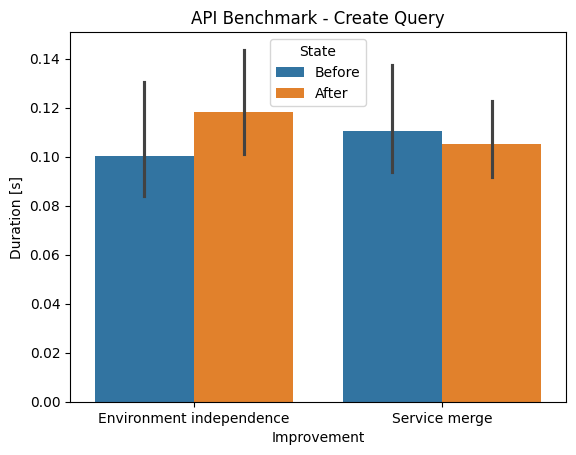

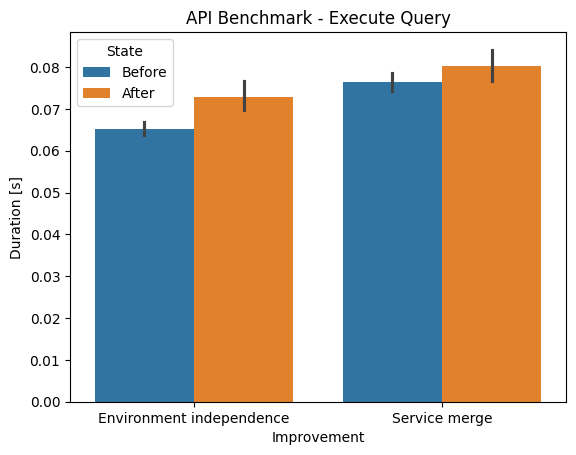

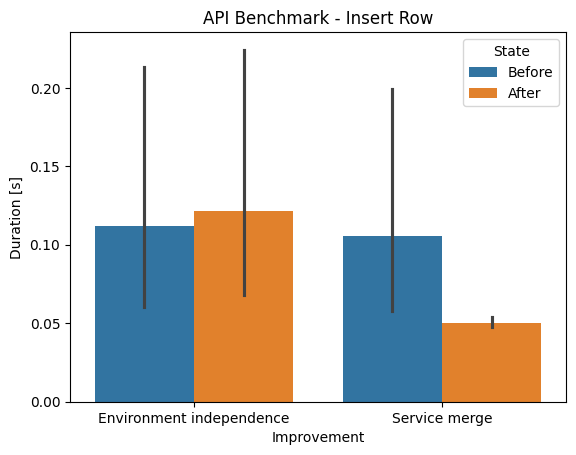

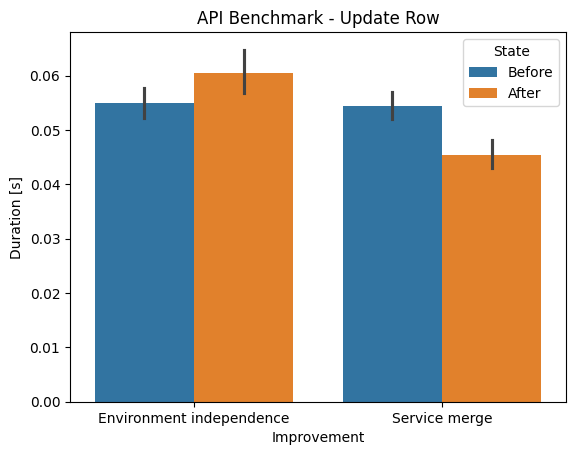

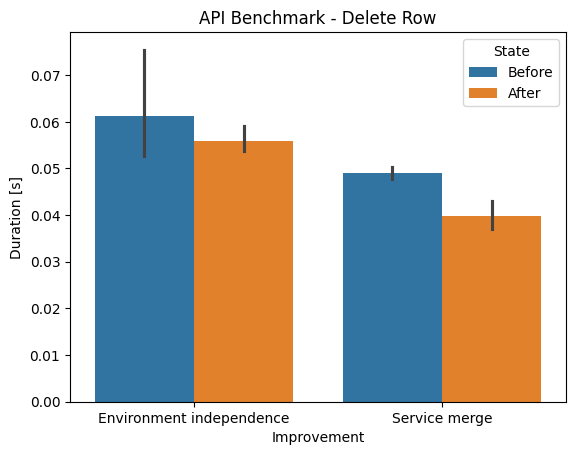

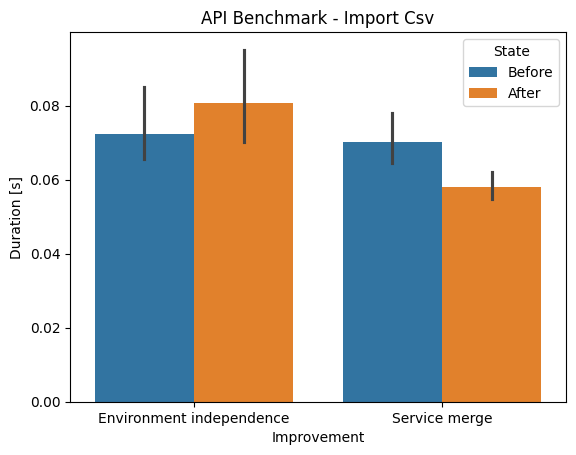

In [6]:
for api_action in api_actions:
    data = concat_results(
        action=api_action,
        states=states,
        directory=OUT_DIR,
    )
    sns.barplot(
        data=data,
        x="Improvement",
        y="Duration",
        hue="State",
    )
    plt.title(f"API Benchmark - {api_action.replace('-', ' ').title()}")
    plt.ylabel("Duration [s]")
    plt.savefig(FIG_DIR / f"api-benchmark_{api_action}.pdf")
    plt.show()